<h2> Problem Statement </h2>

* Build a model to answer: "What sorts of people were more likely to sruvive?"

In [1]:
%matplotlib inline

#### Table of contents

* Exploratory Data Analysis
    * [Single Variable EDA](#first-bullet)
    * [Pairwise EDA](#second-bullet)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from tabulate import tabulate
import scipy.stats as stats

sns.set(style="whitegrid")

In [3]:
FILE_PATH_TRAIN = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'
FILE_PATH_TEST = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'

In [4]:
train_data = pd.read_csv(FILE_PATH_TRAIN)
test_data = pd.read_csv(FILE_PATH_TEST)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.head()
train_data.columns = train_data.columns.str.lower()

### Exploratory Data Analysis (EDA)
The following process will be followed for EDA:
1. [Single variable EDA](#single_eda)
    * [PassengerId](#passengerid)
    * [Survived](#survived)
    * [Pclass](#pclass)
    * [Sex](#sex)
    * [Age](#age)
    * [Sibsp](#sibsp)
    * [Parch](#parch)
    * [Fare](#fare)
2. [Pairwise EDA](#pair_eda)
    * [Survived v.s Pclass](#survived_pclass)
    * [Survived v.s Sex](#survived_sex)
    * [Survived v.s Age](#survived_age)
    * [Survived v.s Sibsp](#survived_sibsp)
    * [Survived v.s Parch](#survived_parch)
    * [Survived v.s Fare](#survived_fare)

#### <a id="passengerid">Single variable EDA</a>

##### <a id="passengerid">PassengerId</a>

This variable isn't really useful for any analysis and it doesn't provide any insight into the data. So, we'll skip this variable and not consider for modeling.

##### <a class="anchor" id="survived">Survived (Target)</a>

This is a binary categorical variable where 0 = did *NOT* survive and 1 = did sruvive

In [7]:
train_data['survived'].value_counts(normalize=True).sort_index()

0    0.616162
1    0.383838
Name: survived, dtype: float64

Out of the 891 passengers, only 38% (342) survived. It would be interesting to see the survival rates by different age groups, sex and ticket class.

In [8]:
counts = train_data['survived'].value_counts().sort_index()
counts

0    549
1    342
Name: survived, dtype: int64

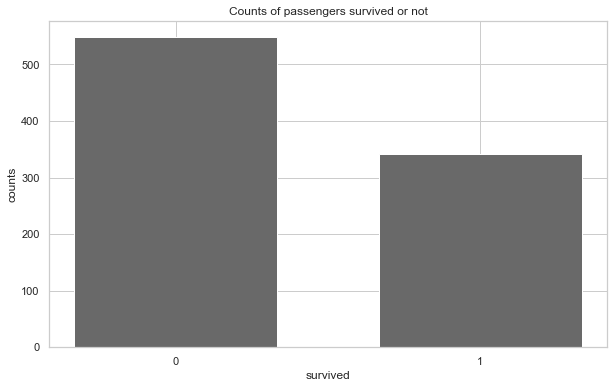

In [9]:
width = 1/1.5

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers survived or not')
axes.set_xlabel('survived')
axes.set_ylabel('counts')
plt.show()
plt.close()

##### <a class="anchor" id="pclass">Pclass</a>

This is the class of the ticket that passengers bought. 1 = 1st class, 2 = 2nd class and 3 = 3rd class. With 1st class being the most expensive or probably on the upper deck. I would assume that the survival rates for the 3rd class passengers should be very low since their deck got flooded the first.

In [10]:
# Checking to see if there are any NULLs
tra[['Pclass']].info()

NameError: name 'train' is not defined

In [ ]:
counts = train['Pclass'].value_counts().sort_index()
counts

In [ ]:
train['Pclass'].value_counts(normalize=True).sort_index()

Majority of the passengers travelling had a 3rd class ticket, 55% to be precise. Followed by the 1st class with 24% and following 2nd class with 20%.

In [ ]:
width = 1/1.5

figure = plt.figure(figsize=(8,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers by ticket class')
axes.set_xlabel('Pclass')
axes.set_ylabel('counts')
plt.show()
plt.close()

##### <a class="anchor" id="sex">Sex</a>

In [ ]:
train[['Sex']].info()

In [ ]:
counts = train['Sex'].value_counts().sort_index()
counts

In [ ]:
train['Sex'].value_counts(normalize=True).sort_index()

About 65% of the passengers were male. Who had the higher survival rate? Would be interesting to see the distribution of sex by the ticket class and their respective survival rates.

In [ ]:
width = 1/1.5

figure = plt.figure(figsize=(8,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers by sex')
axes.set_xlabel('sex')
axes.set_ylabel('counts')
plt.show()
plt.close()

##### <a class="anchor" id="age">Age</a>

In [ ]:
train[['Age']].info()

In [ ]:
train['Age'].isna().sum()

There are 177 out of the 891 records that don't have the Age of the passenger. Should the age for the missing passengers be replaced with the average age or should we exclude them all together? We should look at those NULL reocrds and see their distribution by sex, pclass, etc.,

Age has a lot of unique values and it would be difficult to visualize this as a categorical variable. So, one way to overcome this is to create a new feature that gives us their age group instead of the exact age. Age groups can be created based on the decade.

In [ ]:
counts = train['Age'].value_counts().sort_index()
counts

In [ ]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers by sex')
axes.set_xlabel('sex')
axes.set_ylabel('counts')
plt.show()
plt.close()

In [ ]:
train['age_group'] = (train['Age'] // 10) * 10

In [ ]:
train['age_group'].value_counts().sort_index()

In [ ]:
counts = train['age_group'].value_counts(normalize=True).sort_index()

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title('Frequency of passengers by age group')
axes.set_xlabel('age group')
axes.set_ylabel('counts')
plt.show()
plt.close()

We can see more than 30% of passengers were between the age of 20-29. There were really less percent of passengers more than 60 years in age. Again, it would be interesting to see this distribution by the different ticket class as well as sex.

##### <a class="anchor" id="sibsp">SibSp</a>

In [ ]:
train['SibSp'].value_counts().sort_index()

This variable tells us the number of siblings or spouses aboard the Titanic. We can see majority of the passengers were traveling by themselves.

In [ ]:
counts = train['SibSp'].value_counts(normalize=True).sort_index()

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title('Frequency of the number of siblings/spouses aboard the Titanic')
axes.set_xlabel('Siblings/Spouses')
axes.set_ylabel('frequency')
plt.show()
plt.close()

##### <a class="anchor" id="parch">Parch</a>

In [ ]:
train['Parch'].value_counts().sort_index()

This feature is similar to `SibSp` where this features tells us the number of parents or children a passenger was traveling with. We can see majority of the passengers were travelling by themselves.

In [ ]:
counts = train['Parch'].value_counts(normalize=True).sort_index()

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title('Frequency of the number of Parents/Children aboard the Titanic')
axes.set_xlabel('Parents/Children')
axes.set_ylabel('frequency')
plt.show()
plt.close()

##### <a class="anchor" id="fare">Fare</a>

In [ ]:
train['Fare'].value_counts().sort_index()

Ticket fare is a continuous variable. We'll have to look at the distribution for this feature and generate some descriptive statistics.

In [ ]:
train[['Fare']].describe()

Is the fare in USD or pound? I think the ticket fares were in pound since it was a British passenger liner. We can see that the average ticket fare was 32.2. The least expensive ticket was 0 which seems weird. Does it mean someone received the ticket for free or is the ticket fare missing for such passengers? The most expensive ticket was 512.33 which I think is very expensive as compared to today's value. 50% of the tickets were less than or equal to 14.45 so the distibution seems very skewed.

In [ ]:
train['PassengerId'][train['Fare'] == 0].count()

There are 15 passengers where their ticket fare was 0

In [ ]:
train[train['Fare'] == 0]

In [ ]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

In [ ]:
h = freeman_diaconis(train['Fare'])
print("Freeman Diaconis: ", h)

mn = int(train['Fare'].min())
mx = int(train['Fare'].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(train['Fare'], bins=bins, color="darkslategray")
axes.set_title('Ticket Fare distribution')
axes.set_xlabel('Fare')
plt.show()
plt.close()

In [ ]:
train['log_fare'] = train['Fare'].apply(lambda x : np.log(x + 1))

In [ ]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(train['log_fare'],  color="darkslategray")
axes.set_title('Ticket Fare distribution (Log Transformation)')
axes.set_xlabel('Fare')
plt.show()
plt.close()

#### <a class="anchor" id="pairwise_eda">Pairwise EDA</a>

    * [Survived v.s Pclass](#survived_pclass)
    * [Survived v.s Sex](#survived_sex)
    * [Survived v.s Age](#survived_age)
    * [Survived v.s Sibsp](#survived_sibsp)
    * [Survived v.s Parch](#survived_parch)
    * [Survived v.s Fare](#survived_fare)

##### <a id="survived_pclass">Survived v.s Pclass</a>

In [ ]:
surv_pclass = pd.crosstab(train['Pclass'], train['Survived'], normalize='index')

In [ ]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
sns.heatmap(surv_pclass, cmap='Blues')
axes.set_title('Heatmap of Pclass v/s Survived')
plt.show()

We can see that someone from third class had a low chance of survival where as someone from the first class had a high chance of survival. This is because the the third class was at the lowest level and it got flooded the first where as the passengers in the first class had a little more time as compared to the third class passengers.

##### <a id="survived_age">Survived v.s Age</a>

In [ ]:
sns.set(style="whitegrid")

In [ ]:
train['Age'].fillna(np.mean(train['Age']))

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
grouped = train.groupby('Survived')
labels = pd.unique(train['Survived'].values)
labels.sort()
grouped_data = [grouped['Age'].get_group( k) for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)

for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

## change color and linewidth of the caps
for cap in patch['caps']:
    cap.set(color='#000000', linewidth=1)

## change color and linewidth of the medians
for median in patch['medians']:
    median.set(color='#000000', linewidth=2)

## change the style of fliers and their fill
for flier in patch['fliers']:
    flier.set(marker='o', color='#000000', alpha=0.2)

for box in patch["boxes"]:
    box.set( facecolor='#FFFFFF', alpha=0.5)


for i, k in enumerate(labels):
    subdata = grouped['Age'].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)
plt.show()

### Prepare Data

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train_data = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'age_group', 'log_fare', 'Survived']].copy(deep=True)

In [ ]:
train_data["male"] = train_data["Sex"].apply(lambda x: 1 if x == "male" else 0)
train_data.drop(columns=["Sex"], inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_data.head()

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,log_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0,2.202765


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_group    714 non-null    float64
 13  log_fare     891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [57]:
train_data = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'age_group', 'log_fare', 'Survived']].copy(deep=True)

In [62]:
train_data["male"] = train_data["Sex"].apply(lambda x: 1 if x == "male" else 0)
train_data.drop(columns=["Sex"], inplace=True)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,age_group,log_fare,Survived,male
0,3,22.0,1,0,7.2500,20.0,2.110213,0,1
1,1,38.0,1,0,71.2833,30.0,4.280593,1,0
2,3,26.0,0,0,7.9250,20.0,2.188856,1,0
3,1,35.0,1,0,53.1000,30.0,3.990834,1,0
4,3,35.0,0,0,8.0500,30.0,2.202765,0,1
